# KNN - Ejemplo - Sleep

**Contexto**  
Este conjunto de datos contiene el detalle de variables relacionadas con el sueño y hábitos diarios.

**Contenido**  
El conjunto de datos proviene de kaggle: [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset).  
Contiene 400 renglones con las siguientes columnas:  

| Variable                | Definición                                       | Valor                       |
| ----------------------- | ------------------------------------------------ | --------------------------- |
| Person ID               | Id persona                                       | Numérico                    |
| Gender                  | Genero de la persona                             | Female, Male                |
| Age                     | Edad de la persona                               | Años                        |
| Occupation              | Ocupación de la persona                          | String                      |
| Sleep Duration          | Número de horas que duerme por día               | Horas                       |
| Quality of Sleep        | Calidad del sueño                                | 1 a 10                      |
| Physical Activity Level | Minutos que dedica a actividades físicas diarias | Minutos por día             |
| Stress Level            | Nivel de stress experimentado                    | 1 a 10                      |
| BMI Category            | Indice de masa muscular                          | String                      |
| Blood Pressure          | Presión arterial (sistólica/diastólica)          | String                      |
| Heart Rate              | Ritmo cardiaco en reposo                         | Latidos por minuto          |
| Daily Steps             | Número de pasos que realiza por dia              | Pasos por día               |
| Sleep Disorder          | Desorden de sueño **(variable objetivo)**        | None, Insomnia, Sleep Apnea |

**Planteamiento del problema**  
Se busca predecir si el cliente presentará algún desorden del sueño, de acuerdo sus las características.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Renombrar columnas
df.columns = ['id_persona', 'genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad',
              'nivel_stress', 'indice_corporal', 'presion_sanguinea', 'ritmo_cardiaco', 'pasos_diarios', 'desorden']

## Mapeos

In [4]:
print(df['genero'].unique())

['Male' 'Female']


In [5]:
df.replace('Female', '0', inplace=True)
df.replace('Male',   '1', inplace=True)
df = df.astype({'genero':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
print(df['ocupacion'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [7]:
df['ocupacion'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: ocupacion, dtype: int64

In [8]:
# Mapeos
df.replace('Manager',              '0', inplace=True)
df.replace('Sales Representative', '1', inplace=True)
df.replace('Scientist',            '2', inplace=True)
df.replace('Software Engineer',    '3', inplace=True)
df.replace('Salesperson',          '4', inplace=True)
df.replace('Accountant',           '5', inplace=True)
df.replace('Teacher',              '6', inplace=True)
df.replace('Lawyer',               '7', inplace=True)
df.replace('Engineer',             '8', inplace=True)
df.replace('Doctor',               '9', inplace=True)
df.replace('Nurse',                '10', inplace=True)
df = df.astype({'ocupacion':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,3,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,1,28,9,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,1,28,9,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,1,28,1,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,1,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
print(df['indice_corporal'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [10]:
df['indice_corporal'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: indice_corporal, dtype: int64

In [11]:
df.replace('Normal',        '0', inplace=True)
df.replace('Normal Weight', '0', inplace=True)
df.replace('Overweight',    '1', inplace=True)
df.replace('Obese',         '2', inplace=True)
df = df.astype({'indice_corporal':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,None
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,None
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,None
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea


In [12]:
df[['sistolica', 'diastolica']] = df['presion_sanguinea'].str.split('/', expand=True)
df = df.astype({'sistolica':'int'})
df = df.astype({'diastolica':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden,sistolica,diastolica
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,None,126,83
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,None,125,80
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,None,125,80
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,140,90
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,140,90


In [13]:
print(df['desorden'].unique())

['None' 'Sleep Apnea' 'Insomnia']


In [14]:
df.replace('None',        '0', inplace=True)
df.replace('Sleep Apnea', '1', inplace=True)
df.replace('Insomnia',    '2', inplace=True)
df = df.astype({'desorden':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden,sistolica,diastolica
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,0,126,83
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,0,125,80
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,0,125,80
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,1,140,90
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,1,140,90


In [15]:
# Seleccionar columnas
df = df[['genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad', 'nivel_stress', 
         'indice_corporal', 'sistolica', 'diastolica', 'ritmo_cardiaco', 'pasos_diarios', 'desorden']]
df.head()

,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,sistolica,diastolica,ritmo_cardiaco,pasos_diarios,desorden
0,1,27,3,6.1,6,42,6,1,126,83,77,4200,0
1,1,28,9,6.2,6,60,8,0,125,80,75,10000,0
2,1,28,9,6.2,6,60,8,0,125,80,75,10000,0
3,1,28,1,5.9,4,30,8,2,140,90,85,3000,1
4,1,28,1,5.9,4,30,8,2,140,90,85,3000,1


## Normalización

In [16]:
# Variables independientes
X = df[['genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad', 'nivel_stress', 
         'indice_corporal', 'sistolica', 'diastolica', 'ritmo_cardiaco', 'pasos_diarios']]
X.head()

,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,sistolica,diastolica,ritmo_cardiaco,pasos_diarios
0,1,27,3,6.1,6,42,6,1,126,83,77,4200
1,1,28,9,6.2,6,60,8,0,125,80,75,10000
2,1,28,9,6.2,6,60,8,0,125,80,75,10000
3,1,28,1,5.9,4,30,8,2,140,90,85,3000
4,1,28,1,5.9,4,30,8,2,140,90,85,3000


In [17]:
# Normalizar
scaler = StandardScaler()
X_adj = scaler.fit_transform(X)
print(X_adj)

[[ 0.9893614  -1.75309569 -2.07715841 ... -0.26810236  1.6547187
  -1.61958404]
 [ 0.9893614  -1.63764266  0.73924248 ... -0.7556402   1.17047394
   1.97007745]
 [ 0.9893614  -1.63764266  0.73924248 ... -0.7556402   1.17047394
   1.97007745]
 ...
 [-1.010753    1.94140144  1.20864263 ...  1.68204901 -0.52438269
   0.11335599]
 [-1.010753    1.94140144  1.20864263 ...  1.68204901 -0.52438269
   0.11335599]
 [-1.010753    1.94140144  1.20864263 ...  1.68204901 -0.52438269
   0.11335599]]


In [18]:
# Variable dependiente
y = df['desorden']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: desorden, dtype: int32

In [19]:
print('X:', len(X_adj), 'y:', len(y))

X: 374 y: 374


## Modelado

In [20]:
# Conjunto de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X_adj, y, test_size=0.3, random_state=0)

In [21]:
print('X_train:', len(X_train), 'y_train:', len(y_train))
print('X_test:',  len(X_test),  'y_test:',  len(y_test))

X_train: 261 y_train: 261
X_test: 113 y_test: 113


In [22]:
# Entrenamiento
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
# Predicciones
prediction = model.predict(X_test)
prediction

array([0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0])

## Evaluacion

In [24]:
print(confusion_matrix(y_test, prediction))

[[58  7  1]
 [ 3 15  6]
 [ 6  2 15]]


In [25]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        66
           1       0.62      0.62      0.62        24
           2       0.68      0.65      0.67        23

    accuracy                           0.78       113
   macro avg       0.72      0.72      0.72       113
weighted avg       0.78      0.78      0.78       113



## Determinar K adecuado

In [26]:
# Esto tomara un tiempo
error_rate = []

for i in range(1,40):
    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    error_rate.append(np.mean(prediction != y_test))

Text(0, 0.5, 'Error')

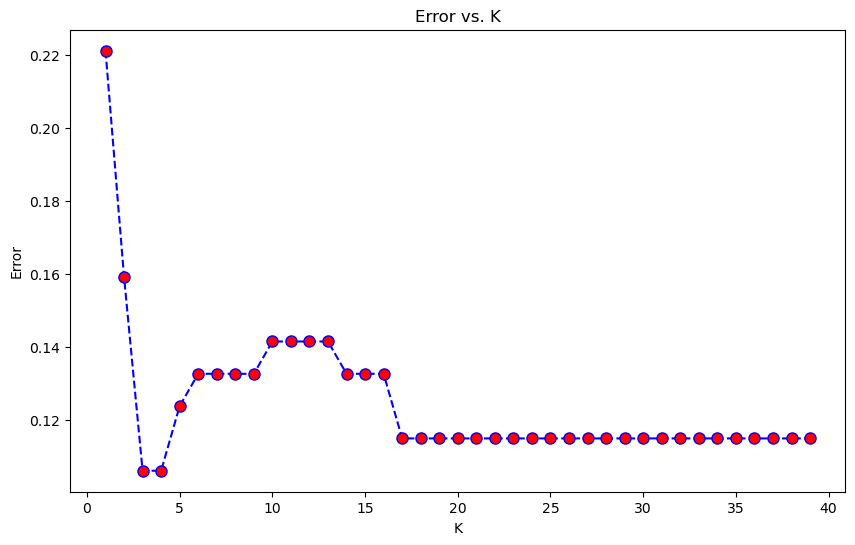

In [27]:
# Visualización de resultados
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')

Podemos ver que con 3 y 4 vecinos, se logra un menor error, pero se incrementa al usar 5 vecinos.
Al llegar a 17 vecnos, el valor se estabiliza

In [28]:
# K=1
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

print('K = 1')
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test,prediction))

K = 1
[[58  7  1]
 [ 3 15  6]
 [ 6  2 15]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        66
           1       0.62      0.62      0.62        24
           2       0.68      0.65      0.67        23

    accuracy                           0.78       113
   macro avg       0.72      0.72      0.72       113
weighted avg       0.78      0.78      0.78       113



In [29]:
# K=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

print('K = 3')
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test,prediction))

K = 3
[[63  1  2]
 [ 3 20  1]
 [ 2  3 18]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        66
           1       0.83      0.83      0.83        24
           2       0.86      0.78      0.82        23

    accuracy                           0.89       113
   macro avg       0.87      0.86      0.86       113
weighted avg       0.89      0.89      0.89       113



In [30]:
# K=17
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

print('K = 17')
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test,prediction))

K = 17
[[61  0  5]
 [ 3 18  3]
 [ 2  0 21]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       1.00      0.75      0.86        24
           2       0.72      0.91      0.81        23

    accuracy                           0.88       113
   macro avg       0.88      0.86      0.86       113
weighted avg       0.90      0.88      0.89       113

